In [2]:
from scipy.integrate import odeint
import numpy as np
from numpy import sin, cos, sqrt
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def eq_of_motion(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x, theta, x_dot, theta_dot]
        t :  time
        p :  vector of the parameters:
                  p = [m1, m2, k, l, g, wf]
    
    Returns:
        sysODE : An list representing the system of equations of motion as 1st order ODEs
    """
    x, y, beta, x_dot, y_dot, beta_dot = w
    m, k, g, H, c, D, t, Izz, k_beta, c_beta, L_1_init, L_2_init = p

    # Create sysODE = (x', theta', x_dot', theta_dot'):
    sysODE = [x_dot,
              y_dot,
              beta_dot,
              (-D*m*sin(beta)*beta_dot**2/2 + D*m*(-D*g*m*sin(beta)/2 + D*(-D*m*sin(beta)*beta_dot**2/2 + c*(H - x)*(x_dot + y_dot)/sqrt((H - x)**2 + y**2) - c*(x_dot + y_dot)*x/sqrt(x**2 + y**2) - 1.0*k*(-H + x)*(-L_2_init + sqrt((H - x)**2 + y**2))/sqrt((H - x)**2 + y**2) - 1.0*k*(-L_1_init + sqrt(x**2 + y**2))*x/sqrt(x**2 + y**2))*cos(beta)/2 + D*(D*m*cos(beta)*beta_dot**2/2 - c*(x_dot + y_dot)*y/sqrt(x**2 + y**2) - c*(x_dot + y_dot)*y/sqrt((H - x)**2 + y**2) + g*m - 1.0*k*(-L_1_init + sqrt(x**2 + y**2))*y/sqrt(x**2 + y**2) - 1.0*k*(-L_2_init + sqrt((H - x)**2 + y**2))*y/sqrt((H - x)**2 + y**2))*sin(beta)/2 - c_beta*beta_dot - 1.0*k_beta*beta - m*(-D*(-sin(beta)*beta_dot*x_dot + cos(beta)*beta_dot*y_dot)/2 + D*sin(beta)*beta_dot*x_dot/2 - D*cos(beta)*beta_dot*y_dot/2)/2 + m*(-D*(-sin(beta)*x_dot + cos(beta)*y_dot)*beta_dot/2 + D*sin(beta)*beta_dot*x_dot/2 - D*cos(beta)*beta_dot*y_dot/2)/2)*cos(beta)/(2*(-D**2*m*sin(beta)**2/4 - D**2*m*cos(beta)**2/4 + D**2*m/4 + Izz)) + c*(H - x)*(x_dot + y_dot)/sqrt((H - x)**2 + y**2) - c*(x_dot + y_dot)*x/sqrt(x**2 + y**2) - 1.0*k*(-H + x)*(-L_2_init + sqrt((H - x)**2 + y**2))/sqrt((H - x)**2 + y**2) - 1.0*k*(-L_1_init + sqrt(x**2 + y**2))*x/sqrt(x**2 + y**2))/m,
              (D*m*cos(beta)*beta_dot**2/2 + D*m*(-D*g*m*sin(beta)/2 + D*(-D*m*sin(beta)*beta_dot**2/2 + c*(H - x)*(x_dot + y_dot)/sqrt((H - x)**2 + y**2) - c*(x_dot + y_dot)*x/sqrt(x**2 + y**2) - 1.0*k*(-H + x)*(-L_2_init + sqrt((H - x)**2 + y**2))/sqrt((H - x)**2 + y**2) - 1.0*k*(-L_1_init + sqrt(x**2 + y**2))*x/sqrt(x**2 + y**2))*cos(beta)/2 + D*(D*m*cos(beta)*beta_dot**2/2 - c*(x_dot + y_dot)*y/sqrt(x**2 + y**2) - c*(x_dot + y_dot)*y/sqrt((H - x)**2 + y**2) + g*m - 1.0*k*(-L_1_init + sqrt(x**2 + y**2))*y/sqrt(x**2 + y**2) - 1.0*k*(-L_2_init + sqrt((H - x)**2 + y**2))*y/sqrt((H - x)**2 + y**2))*sin(beta)/2 - c_beta*beta_dot - 1.0*k_beta*beta - m*(-D*(-sin(beta)*beta_dot*x_dot + cos(beta)*beta_dot*y_dot)/2 + D*sin(beta)*beta_dot*x_dot/2 - D*cos(beta)*beta_dot*y_dot/2)/2 + m*(-D*(-sin(beta)*x_dot + cos(beta)*y_dot)*beta_dot/2 + D*sin(beta)*beta_dot*x_dot/2 - D*cos(beta)*beta_dot*y_dot/2)/2)*sin(beta)/(2*(-D**2*m*sin(beta)**2/4 - D**2*m*cos(beta)**2/4 + D**2*m/4 + Izz)) - c*(x_dot + y_dot)*y/sqrt(x**2 + y**2) - c*(x_dot + y_dot)*y/sqrt((H - x)**2 + y**2) + g*m - 1.0*k*(-L_1_init + sqrt(x**2 + y**2))*y/sqrt(x**2 + y**2) - 1.0*k*(-L_2_init + sqrt((H - x)**2 + y**2))*y/sqrt((H - x)**2 + y**2))/m,
              (-D*g*m*sin(beta)/2 + D*(-D*m*sin(beta)*beta_dot**2/2 + c*(H - x)*(x_dot + y_dot)/sqrt((H - x)**2 + y**2) - c*(x_dot + y_dot)*x/sqrt(x**2 + y**2) - 1.0*k*(-H + x)*(-L_2_init + sqrt((H - x)**2 + y**2))/sqrt((H - x)**2 + y**2) - 1.0*k*(-L_1_init + sqrt(x**2 + y**2))*x/sqrt(x**2 + y**2))*cos(beta)/2 + D*(D*m*cos(beta)*beta_dot**2/2 - c*(x_dot + y_dot)*y/sqrt(x**2 + y**2) - c*(x_dot + y_dot)*y/sqrt((H - x)**2 + y**2) + g*m - 1.0*k*(-L_1_init + sqrt(x**2 + y**2))*y/sqrt(x**2 + y**2) - 1.0*k*(-L_2_init + sqrt((H - x)**2 + y**2))*y/sqrt((H - x)**2 + y**2))*sin(beta)/2 - c_beta*beta_dot - 1.0*k_beta*beta - m*(-D*(-sin(beta)*beta_dot*x_dot + cos(beta)*beta_dot*y_dot)/2 + D*sin(beta)*beta_dot*x_dot/2 - D*cos(beta)*beta_dot*y_dot/2)/2 + m*(-D*(-sin(beta)*x_dot + cos(beta)*y_dot)*beta_dot/2 + D*sin(beta)*beta_dot*x_dot/2 - D*cos(beta)*beta_dot*y_dot/2)/2)/(-D**2*m*sin(beta)**2/4 - D**2*m*cos(beta)**2/4 + D**2*m/4 + Izz)
             ]
    return sysODE

In [94]:
# Set up simulation parameters 
m = 1.0
k = 10.0 
# L = 1.0 
g = 9.81 
H = 20.0 
c = 1.0 
D = 1.0 
Izz = 0.3333
k_beta = 1.0
c_beta = 1.0
L_1_init = 18.6249
L_2_init = 19.7227 


# ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 20.0
numpoints = 100000

# Create the time samples for the output of the ODE solver
t = np.linspace(0.0, stoptime, numpoints)

# Initial conditions
x_init = 9.0                        # initial position
x_dot_init = 0.0                    # initial velocity
y_init = 17.0                   # initial angle
y_dot_init = 0.0                # initial angular velocity
beta_init = 0.0                        # initial position
beta_dot_init = 0.0 

# wf = np.np.sqrt(k / m1)                # forcing function frequency

# Pack the parameters and initial conditions into arrays 
p = [m, k, g, H, c, D, t, Izz, k_beta, c_beta, L_1_init, L_2_init]
x0 = [x_init, y_init, beta_init, x_dot_init, y_dot_init, beta_dot_init]
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)
freq, mag = CRAWLAB_fft(resp[:,2],t,False)
np.savetxt("response.csv", resp, delimiter=",")
np.savetxt("sim_time.csv", t, delimiter=",")

0.35000350007


array([ 17.        ,  17.        ,  17.        , ...,  17.00003265,
        17.00003265,  17.00003265])

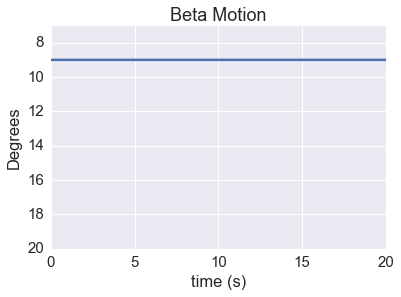

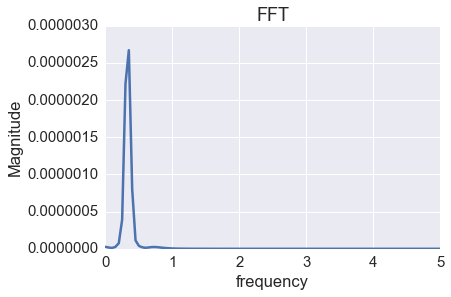

In [100]:
plt.figure(0)
# plt.subplot(211)
# plt.plot(t, np.degrees(resp[:,2]))
plt.plot(t,resp[:,0])
plt.ylim(20,7)
plt.title('Beta Motion')
plt.xlabel('time (s)')
plt.ylabel('Degrees')

plt.figure(1)
plt.plot(freq, mag)
plt.title('FFT')
plt.xlabel('frequency')
plt.ylabel('Magnitude')
plt.xlim(0, 5)
freq_index = np.argmax(mag)
print(freq[freq_index])

# Should return the zero crossings
# zeros = get_zero_crossings(t, np.degrees(resp[:,2]))

# Get the peaks of the response
# localMaxes, localMax_Times, localMins, localMin_Times = get_local_Extrema(t, np.degrees(resp[:,2]))

# Calculate the damping ratio from both the local maxes and the local minimums
# zeta_maxes = log_dec(localMaxes[0],localMaxes[-1],len(localMaxes)-1)
# zeta_mins = log_dec(localMins[0],localMins[-1],len(localMins)-1)

# Average the damping ratio from the positive and negative sides of the plot.
# zeta_fromLogDec = np.mean([zeta_maxes, zeta_mins]) 

# print '\nThe damping ratio found from the positive peaks is {:.4f}'.format(zeta_maxes)
# print 'The damping ratio found from the negative peaks is {:.4f}'.format(zeta_mins)
# print 'The damping ratio found from the log dec is {:.4f}\n'.format(zeta_fromLogDec)
resp[:,1]

In [97]:
nat_freq_high = np.array([(0)])
nat_freq_medium = np.array([(0)])
nat_freq_low = np.array([(0)])

localMaxes, localMax_Times, localMins, localMin_Times = get_local_Extrema(freq,mag)
    
first_max = np.argmax(localMaxes)
localMaxes[first_max] = 0
high_mode = localMax_Times[first_max]
nat_freq_high = np.append(nat_freq_high, [(high_mode)], axis=0)

second_max = np.argmax(localMaxes)
localMaxes[second_max] = 0
medium_mode = localMax_Times[second_max]
nat_freq_medium = np.append(nat_freq_medium, [(medium_mode)], axis=0)

third_max = np.argmax(localMaxes)
low_mode = localMax_Times[third_max]
nat_freq_low = np.append(nat_freq_low, [(low_mode)], axis=0)

In [48]:
print(nat_freq_high,
nat_freq_medium,
nat_freq_low)

[ 0.          0.48381764] [ 0.          0.91758517] [ 0.         0.4504509]


In [7]:
def CRAWLAB_fft(data,time,plotflag):
    ''' Function to get the FFT for a response
    #
    # Inputs:
    #   time = time array corresponding to the data
    #   data = the response data array (only pass a single dimension/state at at time)
    #   plotflag = will plot the FFT if nonzero
    #   
    # Output:
    #   fft_freq = an array of the freqs used in the FFT
    #   fft_mag = an array of the amplitude of the FFT at each freq in fft_freq
    #
    # Created: 03/28/14
    #   - Joshua Vaughan
    #   - joshua.vaughan@louisiana.edu
    #   - http://www.ucs.louisiana.edu/~jev9637
    ######################################################################################
    '''
    
    from scipy.fftpack import fft
    
    # correct for any DC offset
    offset = np.mean(data) 

    # Get the natural frequency
    sample_time = time[1] - time[0]
    n = len(data)

    fft_mag = fft((data - offset)*np.hanning(len(data)))
    fft_freq = np.linspace(0.0, 1.0/(2.0*sample_time), n/2)
    
    # Only return the "useful" part of the fft
    fft_mag = 2.0/n * np.abs(fft_mag[0:n/2])
    
    if plotflag:
        # Plot the relationshiop
        #   Many of these setting could also be made default by the .matplotlibrc file
        fig = plt.figure(figsize=(6,4))
        ax = plt.gca()
        plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
        plt.setp(ax.get_ymajorticklabels(),fontsize=18)
        plt.setp(ax.get_xmajorticklabels(),fontsize=18)
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.grid(True,linestyle=':',color='0.75')
        ax.set_axisbelow(True)

        plt.xlabel('Frequency (Hz)',fontsize=22,labelpad=8)
        plt.ylabel('FFT magnitude',fontsize=22,labelpad=10)
    
        plt.plot(fft_freq, fft_mag, linewidth=2, linestyle='-')
        
        # Adjust the page layout filling the page using the new tight_layout command
        plt.tight_layout(pad=0.5)
        plt.show()
    
    return fft_freq, fft_mag

In [6]:
# First define all the functions we'll need.
def log_dec(peak1,peak2,num_cycles):
    '''##########################################################################################
    # log_dec.py
    #
    # Script to compute damping ratio using log dec method
    #
    # Inputs:
    #   peak1 = the amplitude of the first peak
    #   peak2 = the amplitude of the Nth peak
    #   num_cycles = the number of periods between two peaks
    # 
    # Output:
    #   zeta = the damping ratio
    #
    # NOTE: Plotting is set up for output, not viewing on screen.
    #       So, it will likely be ugly on screen. The saved PDFs should look
    #       better.
    #
    # Created: 03/28/14
    #   - Joshua Vaughan
    #   - joshua.vaughan@louisiana.edu
    #   - http://www.ucs.louisiana.edu/~jev9637
    #
    # Modified:
    #   *
    #
    ######################################################################################
    '''
    import numpy as np

    delta = 1./num_cycles*np.log(peak1 / peak2)

    zeta = 1./np.sqrt(1 + (2 * np.pi/delta)**2)
    
    return zeta
    

def get_local_Extrema(time,data):
    ''' # Function to get the local extrema for a response
    #
    # Inputs:
    #   time = time array corresponding to the data
    #   data = the response data array (only pass a single dimension/state at at time)
    #
    # Output:
    #   localMaxes = the amplitude of the local maxes
    #   localMax_Times = the times of the local maxes
    #
    # Created: 03/28/14
    #   - Joshua Vaughan
    #   - joshua.vaughan@louisiana.edu
    #   - http://www.ucs.louisiana.edu/~jev9637
    ######################################################################################
    '''
    from scipy import signal
    
    # Get local maximums
    localMax_indexes = signal.argrelextrema(data, np.greater)
    localMaxes = data[localMax_indexes]
    localMax_Times = time[localMax_indexes]

    # Get local minimums
    localMin_indexes = signal.argrelextrema(data, np.less)
    localMins = data[localMin_indexes]
    localMin_Times = time[localMin_indexes]
    
    return localMaxes, localMax_Times, localMins, localMin_Times
    

def get_zero_crossings(time,data):
    ''' Function to get the local extrema for a response
    #
    # Inputs:
    #   time = time array corresponding to the data
    #   data = the response data array (only pass a single dimension/state at at time)
    #   
    # Output:
    #   zeros = an array of the times of the zero crossings
    #
    # Created: 03/28/14
    #   - Joshua Vaughan
    #   - joshua.vaughan@louisiana.edu
    #   - http://www.ucs.louisiana.edu/~jev9637
    ######################################################################################
    '''
    
    # create an empty zeros array
    zeros = []
    
    for index in range(len(time)-1):
        if np.sign(data[index]) != np.sign(data[index + 1]):
            zeros.append(time[index])
    
    return zeros